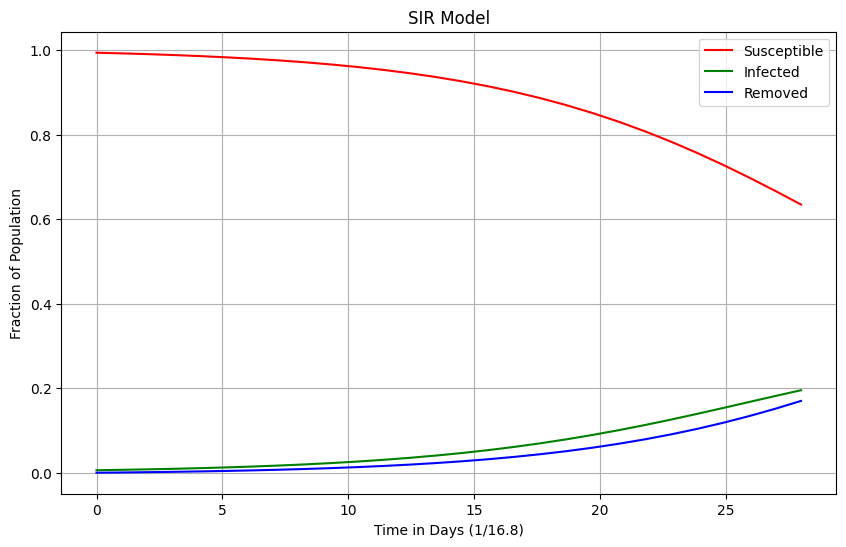

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the SIR model differential equations
def sir_model(y, t, beta, gamma, N):
    S, I, R = y
    dS_dt = -beta * S * I / N
    dI_dt = beta * S * I / N - gamma * I
    dR_dt = gamma * I
    return [dS_dt, dI_dt, dR_dt]

# Set parameters
N = 1               # Total population
I0 = 0.005929193    # Initial number of infected individuals
R0 = 0              # Initial number of recovered individuals
S0 = N - I0 - R0    # Initial number of susceptible individuals
beta = 0.26         # Transmission rate
gamma = 0.1         # Recovery rate
R0_value = beta / gamma # Basic reproduction number

# Time points (days)
t = np.linspace(0, 28, 28)

# Initial conditions vector
initial_conditions = [S0, I0, R0]

# Implement Euler's method
S = np.zeros(len(t))
I = np.zeros(len(t))
R = np.zeros(len(t))

# Initial conditions
S[0], I[0], R[0] = S0, I0, R0

# Time step size
h = t[1] - t[0]

# Perform Euler's method
for i in range(1, len(t)):
    dS_dt = -beta * S[i-1] * I[i-1] / N
    dI_dt = beta * S[i-1] * I[i-1] / N - gamma * I[i-1]
    dR_dt = gamma * I[i-1]

    # Update values for S, I, R
    S[i] = S[i-1] + h * dS_dt
    I[i] = I[i-1] + h * dI_dt
    R[i] = R[i-1] + h * dR_dt

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Susceptible', color='red')
plt.plot(t, I, label='Infected', color='green')
plt.plot(t, R, label='Removed', color='blue')
plt.xlabel('Time in Days (1/16.8)')
plt.ylabel('Fraction of Population')
plt.title('SIR Model')
plt.legend()
plt.grid()
plt.show()